In [1]:
import numpy as np
from tqdm import tqdm
import timeit
from matplotlib import pyplot as plt
from Code import ULA
from Code import Algo1
from Code import ZVnbrosse

## Setup

In [13]:
dim = 8
h = 0.1
n = 1000
N_train = 50
N_test = 50
n_tilde = 70
deg = 1
def f_grad(x):
    a = np.ones(dim) / np.sqrt(2*dim)
    return x-2*a+5*a/(1 + np.exp(2* (x.T @ a)))

def local_weighted_estimator(X):
    return X.sum(axis=1).mean()

def estimator(XX):
    Pi = np.empty(XX.shape[0])
    for i in tqdm(range(XX.shape[0])):
        Pi[i] = local_weighted_estimator(XX[i])
    return Pi

In [7]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot
# from plotly.graph_objs import *
# init_notebook_mode()

# X_plot = np.linspace(-4, 4,num = 50)
# Y_plot = np.linspace(-4,4 ,num = 50)
# X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)
# Z_plot_real = X_plot + Y_plot

# Z_plot = np.empty((X_plot.shape[0],X_plot.shape[0]))
# for i in range(X_plot.shape[0]):
#     XY_plot = np.hstack((X_plot[i].reshape(-1,1,1), Y_plot[i].reshape(-1,1,1)))
#     for j in range(X_plot.shape[0]):
#         Z_plot[i,j] = G_pml_predict(XY_plot[j],pml,Betas)
        
# predict_plot = go.Surface(x = X_plot, y = Y_plot,z=Z_plot)
# real_scatter = go.Scatter3d(
#     x=generate_X_reduced(XX,pml)[:,1],
#     y=generate_X_reduced(XX,pml)[:,2],
#     z=generate_y_reduced(XX,pml),
#     mode='markers',
#     marker=dict(
#         size=5,
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8
#     )
# )       
        
# data = [predict_plot, real_scatter]
# plotly.offline.plot(data, filename="surface_G_pml={}".format(pml))

### Generate sample and plot

In [8]:
np.random.seed(2342)
X, G, Z = ULA.ULA_with_burnin(d=dim, step=h, burn_in=10000, n=100000,f_grad=f_grad)

expectation =  -3.207475528894428


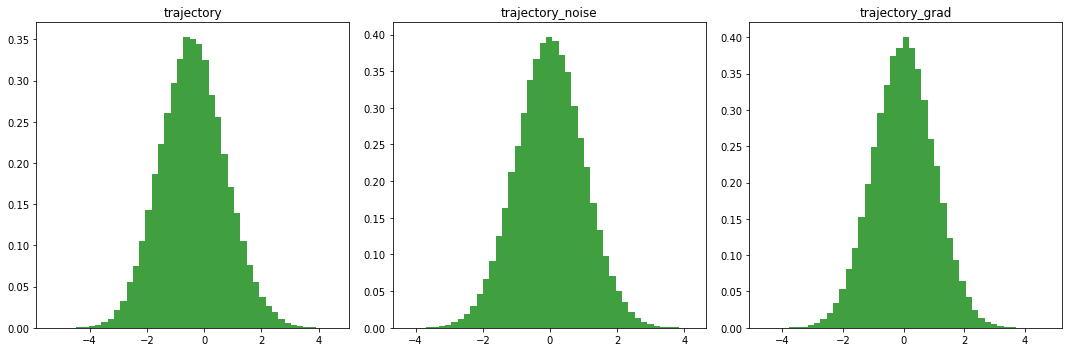

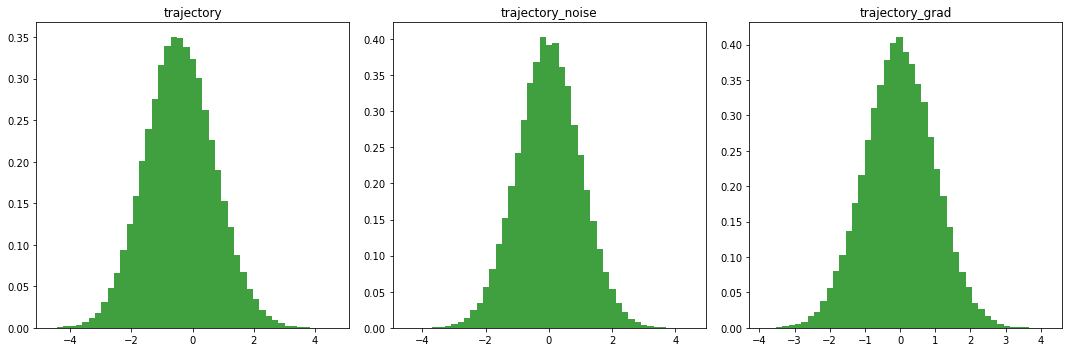

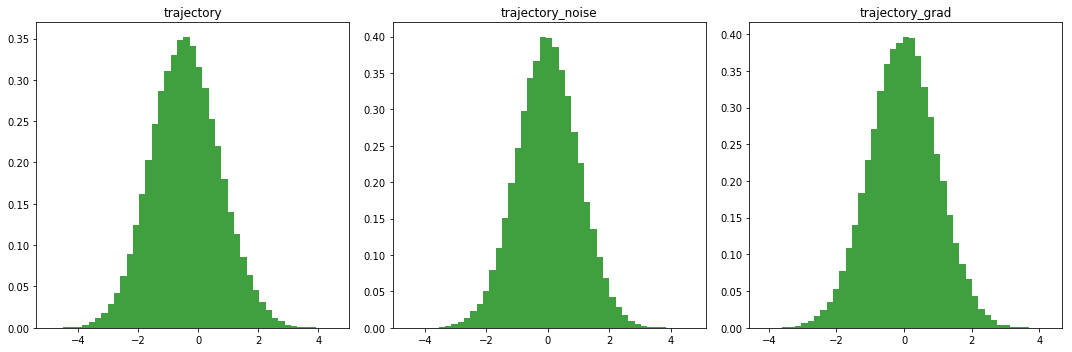

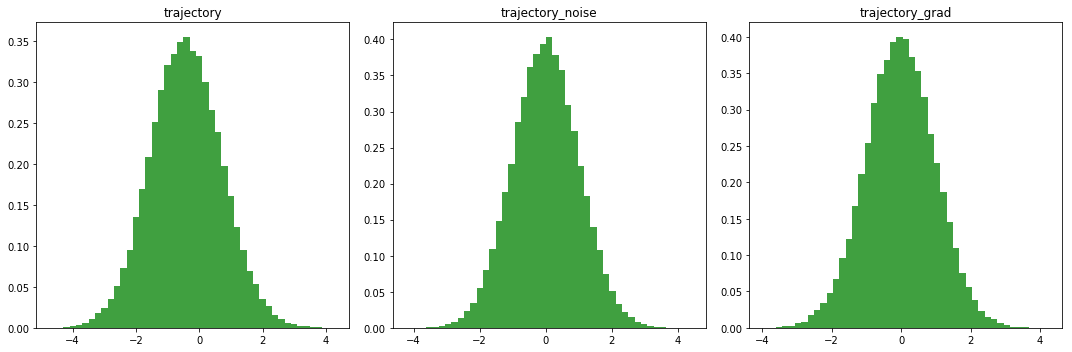

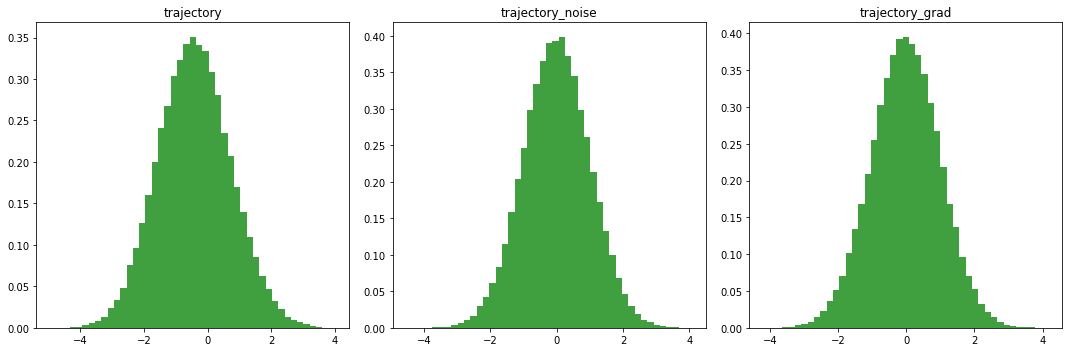

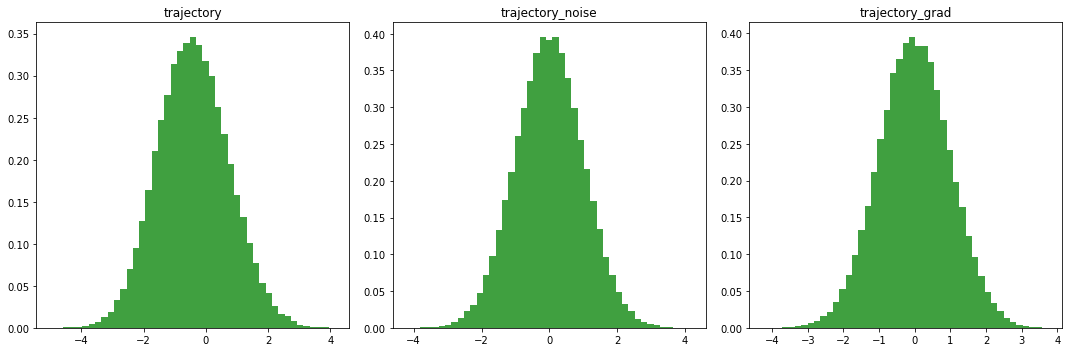

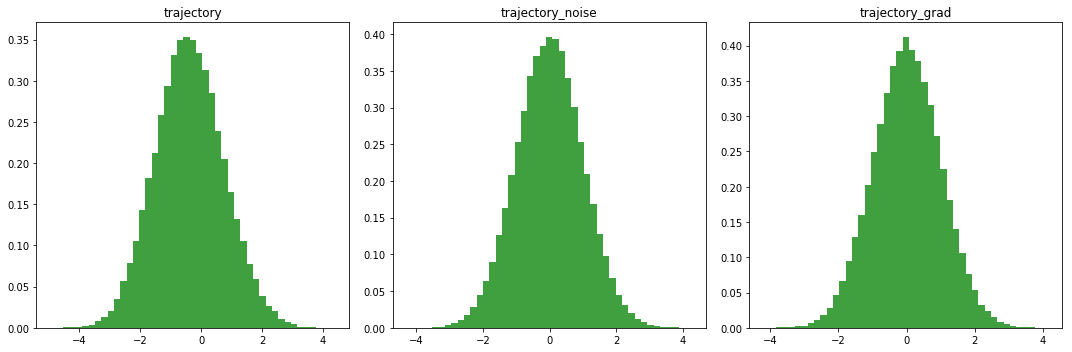

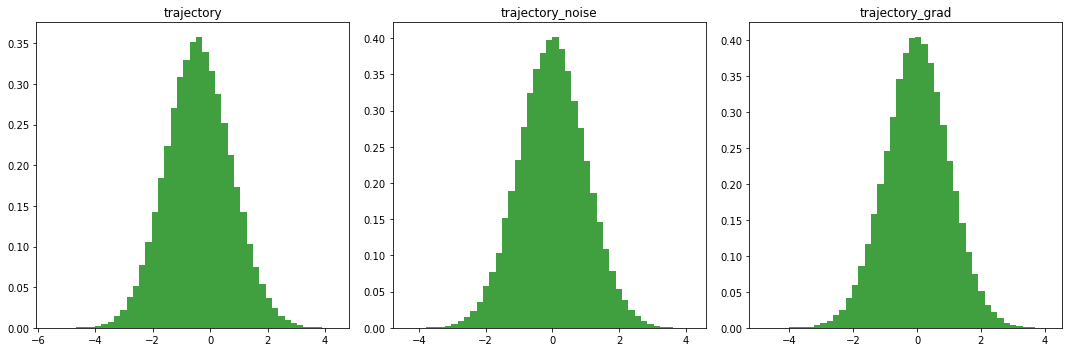

In [38]:
print ('expectation = ',local_weighted_estimator(X))
ULA.plot_distr(X,Z,G,0)
ULA.plot_distr(X,Z,G,1)
ULA.plot_distr(X,Z,G,2)
ULA.plot_distr(X,Z,G,3)
ULA.plot_distr(X,Z,G,4)
ULA.plot_distr(X,Z,G,5)
ULA.plot_distr(X,Z,G,6)
ULA.plot_distr(X,Z,G,7)

### Generate train ant test trajectories

In [10]:
np.random.seed(123)

XX, GG, ZZ = ULA.generate_train_trajectories(X, N_train=N_train,d = dim, step = h, n = n, f_grad=f_grad)
XX_test, GG_test, ZZ_test = ULA.generate_test_trajetories(N_test=N_test, d =dim, step=h, 
                                                          burn_in=10000, n = n, f_grad=f_grad)

### Algorithm 1 

In [14]:
Betas, degrees = Algo1.G_pml_fit_meansum(XX,max_deg = deg)

100%|██████████| 1000/1000 [00:04<00:00, 206.37it/s]


In [15]:
k_comb = np.zeros((dim,dim), dtype=np.int16)
for i in range(dim):
    k_comb[i,i] = 1

### Check and time

In [17]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, n_tilde)
    print ("(k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -2.7269370191117015
(k = [1 0 0 0 0 0 0 0]) = -2.69564797223885 [Time:53.72156295800232]
(k = [0 1 0 0 0 0 0 0]) = -2.452183507705689 [Time:107.65294435700343]
(k = [0 0 1 0 0 0 0 0]) = -3.0689702631507103 [Time:160.47591561699664]
(k = [0 0 0 1 0 0 0 0]) = -2.978366811989396 [Time:213.55900914000085]
(k = [0 0 0 0 1 0 0 0]) = -2.967825962211085 [Time:266.4018108989985]
(k = [0 0 0 0 0 1 0 0]) = -3.443304074820814 [Time:319.2771448010026]
(k = [0 0 0 0 0 0 1 0]) = -3.1226318699750872 [Time:372.09858806400007]
(k = [0 0 0 0 0 0 0 1]) = -3.086845699566236 [Time:425.96761269000126]


In [19]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 30)
    print ("(k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -2.7269370191117015
(k = [1 0 0 0 0 0 0 0]) = -2.6990006819820644 [Time:23.242358837997017]
(k = [0 1 0 0 0 0 0 0]) = -2.557983782114383 [Time:46.33013110199681]
(k = [0 0 1 0 0 0 0 0]) = -2.9671408321467085 [Time:69.61478881999938]
(k = [0 0 0 1 0 0 0 0]) = -2.9285534667607407 [Time:92.62424840199674]
(k = [0 0 0 0 1 0 0 0]) = -2.933653404939761 [Time:115.75520058099937]
(k = [0 0 0 0 0 1 0 0]) = -3.2913663460759737 [Time:138.8942431789983]
(k = [0 0 0 0 0 0 1 0]) = -3.087213271313067 [Time:161.9802078950015]
(k = [0 0 0 0 0 0 0 1]) = -3.055521880856588 [Time:185.0486690769976]


In [20]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 50)
    print ("(k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -2.7269370191117015
(k = [1 0 0 0 0 0 0 0]) = -2.6917557168236086 [Time:39.009136318003584]
(k = [0 1 0 0 0 0 0 0]) = -2.487170593015377 [Time:77.06593473900284]
(k = [0 0 1 0 0 0 0 0]) = -3.0301272067157266 [Time:115.27008638199914]
(k = [0 0 0 1 0 0 0 0]) = -2.9631052838707683 [Time:153.3345597880034]
(k = [0 0 0 0 1 0 0 0]) = -2.9599571619836644 [Time:191.43213187999936]
(k = [0 0 0 0 0 1 0 0]) = -3.3971604642489597 [Time:229.4729376250034]
(k = [0 0 0 0 0 0 1 0]) = -3.1238151351896657 [Time:267.5472523749995]
(k = [0 0 0 0 0 0 0 1]) = -3.089162343392658 [Time:305.5895148280033]


In [22]:
time_1 = timeit.default_timer()
p = local_weighted_estimator(XX_test[-1])
print ("mean of target function =", p)
for i in range(len(k_comb)):
    p = p - Algo1.M_bias(k_comb[i],XX_test[-1],GG_test[-1], ZZ_test[-1], h, degrees,Betas, 10)
    print ("(k = {}) = {} [Time:{}]".format(k_comb[i],p,timeit.default_timer()-time_1))

mean of target function = -2.7269370191117015
(k = [1 0 0 0 0 0 0 0]) = -2.718875954270416 [Time:8.046268421996501]
(k = [0 1 0 0 0 0 0 0]) = -2.6648401846595635 [Time:16.065138121994096]
(k = [0 0 1 0 0 0 0 0]) = -2.845318980893126 [Time:23.898258318993612]
(k = [0 0 0 1 0 0 0 0]) = -2.8383417512016442 [Time:31.946246252999117]
(k = [0 0 0 0 1 0 0 0]) = -2.8413831839869075 [Time:40.29502307799703]
(k = [0 0 0 0 0 1 0 0]) = -3.015942810248324 [Time:48.14162938899972]
(k = [0 0 0 0 0 0 1 0]) = -2.927101615462896 [Time:55.95832400099607]
(k = [0 0 0 0 0 0 0 1]) = -2.9148463447791824 [Time:63.77768508599547]


## Check results on test trajectories

In [25]:
P_test = estimator(XX_test)

100%|██████████| 50/50 [00:00<00:00, 17088.92it/s]


In [ ]:
M_test = np.empty((len(k_comb),P_test.shape[0]))
for i in range(len(k_comb)):
    M_test[i] = Algo1.estimator_bias(k_comb[i], XX_test, GG_test, ZZ_test, h, degrees,Betas, n_tilde, n_jobs=8)

In [23]:
res_zv_1 = []
for i in range (XX_test.shape[0]):
    res_zv_1.append(ZVnbrosse.ZVpolyOne(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_zv_1 = np.array(res_zv_1).reshape(-1)

res_zv_2 = []
for i in range (XX_test.shape[0]):
    res_zv_2.append(ZVnbrosse.ZVpolyTwo(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_zv_2 = np.array(res_zv_2).reshape(-1)

res_cv_1 = []
for i in range (XX_test.shape[0]):
    res_cv_1.append(ZVnbrosse.CVpolyOne(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_cv_1 = np.array(res_cv_1).reshape(-1)

res_cv_2 = []
for i in range (XX_test.shape[0]):
    res_cv_2.append(ZVnbrosse.CVpolyTwo(XX_test[i].reshape(-1,dim), GG_test[i].reshape(-1,dim)))
res_cv_2 = np.array(res_cv_2).reshape(-1)

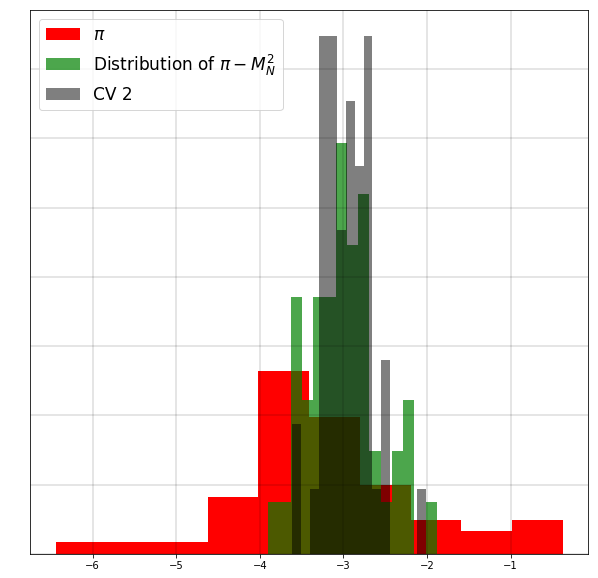

In [41]:
plt.figure(figsize=(10,10))
plt.hist(P_test,10, facecolor='r', density=True, alpha=1, label=r"$\pi$")

plt.hist((P_test-M_test.sum(axis=0)),15, density=True, facecolor='g', alpha=0.7, label="Distribution of $\pi - M^2_N$")

# plt.hist(res_zv_1,15, facecolor='y', density=True, alpha=0.5, label="ZV 1")
# plt.hist(res_zv_2,15, facecolor='b', density=True, alpha=0.5, label="ZV 2")
# plt.hist(res_cv_1,15, facecolor='pink', density=True, alpha=0.5, label="CV 1")
plt.hist(res_cv_2,15, facecolor='black', density=True, alpha=0.5, label="CV 2")

plt.legend(loc=2, prop={'size': 17})
plt.grid(linestyle='-', linewidth=0.2, color='black')
plt.tick_params(axis='y',color = 'w', labelcolor = 'w', which='both')
# plt.xlim(-0.65, 0.65)
plt.show()

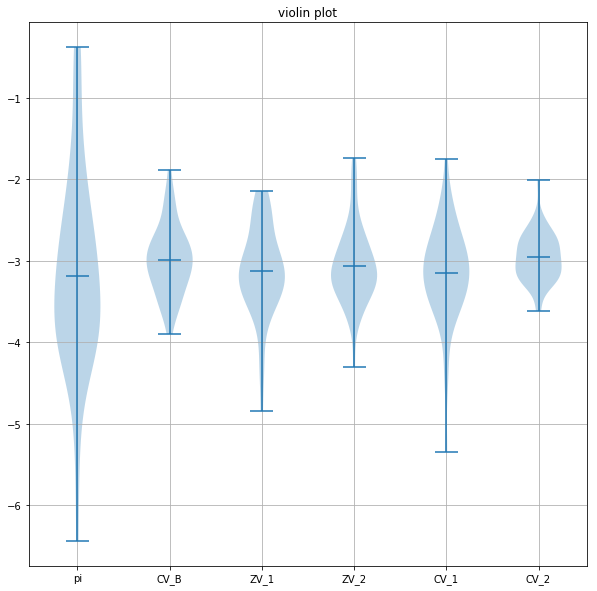

In [34]:
all_data = [P_test]
all_data.append(P_test - M_test.sum(axis = 0))
all_data.append(res_zv_1)
all_data.append(res_zv_2)
all_data.append(res_cv_1)
all_data.append(res_cv_2)
    
plt.figure(figsize=(10,10))
plt.violinplot(all_data, showmeans=True, showmedians=False)
plt.title('violin plot')
plt.xticks(np.arange(1,7), ('pi', 'CV_B', 'ZV_1', 'ZV_2', 'CV_1', 'CV_2'))
plt.grid()
plt.show()

In [35]:
print ('          Variance of Pi = ',P_test.var(ddof = 1))
for i in range(len(k_comb)):
    print ('Variance of new estimator =',(P_test-M_test[:i+1].sum(axis = 0)).var(ddof = 1))
print ('        Variance of CV 1 = ',res_cv_1.var(ddof=1))
print ('        Variance of CV 2 = ',res_cv_2.var(ddof=1))
print ('        Variance of ZV 1 = ',res_zv_1.var(ddof=1))
print ('        Variance of ZV 2 = ',res_zv_2.var(ddof=1))

          Variance of Pi =  1.4289020453663988
Variance of new estimator = 1.2483982941978495
Variance of new estimator = 1.36055961435608
Variance of new estimator = 1.0985156787952541
Variance of new estimator = 1.0102421552224532
Variance of new estimator = 0.7380125790718072
Variance of new estimator = 0.4836147204436327
Variance of new estimator = 0.3974827418845268
Variance of new estimator = 0.17782047262283937
        Variance of CV 1 =  0.36297310823026985
        Variance of CV 2 =  0.08730199002628118
        Variance of ZV 1 =  0.3050433978991472
        Variance of ZV 2 =  0.22169201043307632


In [36]:
print ('VRF CVB = ',P_test.var(ddof = 1)/ (P_test - M_test.sum(axis = 0)).var(ddof=1))
print ('VRF CV1 = ',P_test.var(ddof = 1)/res_cv_1.var(ddof = 1))
print ('VRF CV2 = ',P_test.var(ddof = 1)/res_cv_2.var(ddof = 1))
print ('VRF ZV1 = ',P_test.var(ddof = 1)/res_zv_1.var(ddof = 1))
print ('VRF ZV2 = ',P_test.var(ddof = 1)/res_zv_2.var(ddof = 1))

VRF CVB =  8.035644176906038
VRF CV1 =  3.9366609067355602
VRF CV2 =  16.367347925703015
VRF ZV1 =  4.6842582242636155
VRF ZV2 =  6.445437715933164


In [37]:
np.save("logs/custom_8d_M_test_(K = {}, n_tilde={}).npy".format(deg, n_tilde), M_test)